In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [12]:
data = pd.read_csv("C:/Users/Anita Jadhav/Desktop/jupyter programs/bank_data_large.csv")

In [13]:
data.head()

,age,default,cons.price.idx,cons.conf.idx,y
0,56,no,94.087,-35.8,no
1,69,no,94.575,-38.9,no
2,46,no,92.978,-44.1,no
3,32,no,92.661,-41.6,no
4,60,no,94.133,-44.9,yes


In [31]:
data.isnull().sum()

age               0
default           0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [15]:
data['default'] = data['default'].map({'no':0,'yes':1,'unknown':0})
data['y'] = data['y'].map({'no':0,'yes':1})

In [17]:
# Split the data into features (X) and target (y)
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = rf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [25]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': <scipy.stats....0017D6A064E10>, 'n_estimators': <scipy.stats....0017D69FA2120>}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


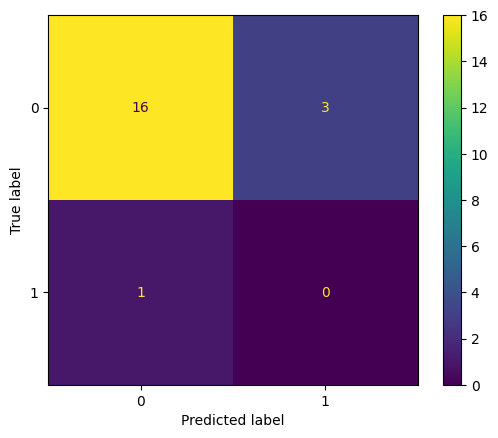

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

In [22]:
TP = 16  # True Positive
FP = 1   # False Positive
FN = 3   # False Negative
TN = 0   # True Negative

# Accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)
print("Accuracy:", accuracy)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

recall = TP / (TP + FN)
print("Recall:", recall)

f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1)

Accuracy: 0.8
Precision: 0.9411764705882353
Recall: 0.8421052631578947
F1 Score: 0.8888888888888888
